In [1]:
from pso import ParticleSwarmOptimizedClustering
from apso import AdaptiveParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
from utils import normalize
from kmeans import KMeans
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
# Load and preprocess data
data = pd.read_csv('seed.txt', sep='\t', header=None)
x = data.drop([7], axis=1)
x = x.values
x = normalize(x)
x

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

In [3]:
# K-Means
kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
kmeans.fit(x)
predicted_kmeans = kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=x, labels=predicted_kmeans))


Silhouette: 0.4221267624201065
SSE: 22.026451226606625
Quantization: 0.30155146657476695


In [4]:
kmeans2 = KMeans(n_cluster=3, init_pp=True, seed=2018)
kmeans2.fit(x)
predicted_kmeans2 = kmeans2.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans2.SSE)
print('Quantization:', quantization_error(centroids=kmeans2.centroid, data=x, labels=predicted_kmeans2))

Silhouette: 0.4221267624201065
SSE: 22.024363075666038
Quantization: 0.30166461874754386


In [5]:
# PSO
pso = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=True, max_iter=2000, print_debug=50)
hist = pso.run()

pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()
predicted_pso = pso_kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=x, labels=predicted_pso))
print('Quantization:', pso.gbest_score)


Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301664618747543856
Iteration 0051/2000 current gbest score 0.301335139418732634
Iteration 0101/2000 current gbest score 0.301193947497523984
Iteration 0151/2000 current gbest score 0.301108766683733764
Iteration 0201/2000 current gbest score 0.301101672125096809
Iteration 0251/2000 current gbest score 0.301100067715324771
Iteration 0301/2000 current gbest score 0.301099976007386749
Iteration 0351/2000 current gbest score 0.301099974616665766
Iteration 0401/2000 current gbest score 0.301099974487186228
Iteration 0451/2000 current gbest score 0.301099974457802289
Iteration 0501/2000 current gbest score 0.301099974455977082
Iteration 0551/2000 current gbest score 0.301099974455224517
Iteration 0601/2000 current gbest score 0.301099974454862584
Iteration 0651/2000 current gbest score 0.301099974454770603
Iteration 0701/2000 current gbest score 0.301099974454733521
Iteration 0751/2000 current gbest score

In [6]:
# APSO
apso = AdaptiveParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=True, max_iter=2000, print_debug=50)
hist_apso = apso.run()

apso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
apso_kmeans.centroid = apso.gbest_centroids.copy()
predicted_apso = apso_kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_apso))
print('SSE:', calc_sse(centroids=apso.gbest_centroids, data=x, labels=predicted_apso))
print('Quantization:', apso.gbest_score)

Initial global best score 0.30155146657476695
Iteration 0001/2000 current gbest score 0.301551466574766946
Stagnation detected at iteration 50. Reinitializing particles.
Iteration 0051/2000 current gbest score 0.301551466574766946
Iteration 0101/2000 current gbest score 0.301549100348532273
Iteration 0151/2000 current gbest score 0.301490115044577400
Stagnation detected at iteration 192. Reinitializing particles.
Iteration 0201/2000 current gbest score 0.301490115044577400
Iteration 0251/2000 current gbest score 0.301473610342968268
Iteration 0301/2000 current gbest score 0.301473053329885554
Iteration 0351/2000 current gbest score 0.301471574819629495
Iteration 0401/2000 current gbest score 0.301470159417039141
Iteration 0451/2000 current gbest score 0.301469944129099554
Iteration 0501/2000 current gbest score 0.301404202037888702
Iteration 0551/2000 current gbest score 0.301340663438941059
Iteration 0601/2000 current gbest score 0.301340250860355985
Iteration 0651/2000 current gbest 

In [7]:
# Repeated Test
# K-Means++
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=3, init_pp=True)
    kmean_rep.fit(x)
    predicted_kmean_rep = kmean_rep.predict(x)
    silhouette = silhouette_score(x, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=x, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)


In [8]:
%%time
# PSO
import numpy as np
import warnings
from sklearn.exceptions import NotFittedError
from sklearn.metrics import silhouette_score

pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}

for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=False, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    unique_labels = np.unique(predicted_pso_rep)
    if len(unique_labels) < 2:
        warnings.warn(f"Only one cluster found in iteration {_+1}. Skipping silhouette score calculation.")
        continue
    
    try:
        silhouette = silhouette_score(x, predicted_pso_rep)
        pso_plain['silhouette'].append(silhouette)
    except ValueError as e:
        warnings.warn(f"Error in silhouette score calculation for iteration {_+1}: {str(e)}")
    
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)

print(f"Completed iterations: {len(pso_plain['sse'])}")
print(f"Silhouette scores calculated: {len(pso_plain['silhouette'])}")

Initial global best score 0.36838585675140356
Iteration 0001/2000 current gbest score 0.353163436682787990
Finish with gbest score 0.318375644821327242
Initial global best score 0.38097467036599403
Iteration 0001/2000 current gbest score 0.380974670365994028
Finish with gbest score 0.288734567951968557
Initial global best score 0.33313615144832176
Iteration 0001/2000 current gbest score 0.333136151448321760
Finish with gbest score 0.307465816539649051
Initial global best score 0.33818737917536784
Iteration 0001/2000 current gbest score 0.337078077740492532
Finish with gbest score 0.320937664842953885
Initial global best score 0.38953796174429783
Iteration 0001/2000 current gbest score 0.389537961744297834
Finish with gbest score 0.311853734868021260
Initial global best score 0.3639615374409783
Iteration 0001/2000 current gbest score 0.360090383945754045
Finish with gbest score 0.318313690899493684
Initial global best score 0.37530948576630113
Iteration 0001/2000 current gbest score 0.3

In [9]:
%%time
# PSO Hybrid

pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=True, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)

Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301664618747543856
Finish with gbest score 0.301290125771059680
Initial global best score 0.30155146657476695
Iteration 0001/2000 current gbest score 0.301551466574766946
Finish with gbest score 0.301245770504071420
Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301664618747543856
Finish with gbest score 0.301110112299178834
Initial global best score 0.301551466574767
Iteration 0001/2000 current gbest score 0.301551466574767002
Finish with gbest score 0.301255647610781330
Initial global best score 0.30155146657476695
Iteration 0001/2000 current gbest score 0.301551466574766946
Finish with gbest score 0.301158711873325158
Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301664618747543856
Finish with gbest score 0.301208638128637074
Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.30

In [10]:
%%time
# APSO

apso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    apso_rep = AdaptiveParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=False, max_iter=2000, print_debug=2000)
    apso_rep.run()
    apso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    apso_kmeans.centroid = apso_rep.gbest_centroids.copy()
    predicted_apso_rep = apso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_apso_rep)
    sse = calc_sse(centroids=apso_rep.gbest_centroids, data=x, labels=predicted_apso_rep)
    quantization = apso_rep.gbest_score
    apso_plain['silhouette'].append(silhouette)
    apso_plain['sse'].append(sse)
    apso_plain['quantization'].append(quantization)

Initial global best score 0.3884588340298914
Iteration 0001/2000 current gbest score 0.366411277950942083
Stagnation detected at iteration 59. Reinitializing particles.
Stagnation detected at iteration 195. Reinitializing particles.
Stagnation detected at iteration 323. Reinitializing particles.
Stagnation detected at iteration 1228. Reinitializing particles.
Stagnation detected at iteration 1734. Reinitializing particles.
Finish with gbest score 0.302462091562947344
Initial global best score 0.3827567885857725
Iteration 0001/2000 current gbest score 0.374783144046658745
Stagnation detected at iteration 94. Reinitializing particles.
Stagnation detected at iteration 296. Reinitializing particles.
Finish with gbest score 0.318450746661984085
Initial global best score 0.38040853379347356
Iteration 0001/2000 current gbest score 0.347561037140763585
Stagnation detected at iteration 336. Reinitializing particles.
Stagnation detected at iteration 753. Reinitializing particles.
Stagnation dete

In [11]:
%%time
# APSO Hybrid

apso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    apso_rep = AdaptiveParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=True, max_iter=2000, print_debug=2000)
    apso_rep.run()
    apso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    apso_kmeans.centroid = apso_rep.gbest_centroids.copy()
    predicted_apso_rep = apso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_apso_rep)
    sse = calc_sse(centroids=apso_rep.gbest_centroids, data=x, labels=predicted_apso_rep)
    quantization = apso_rep.gbest_score
    apso_hybrid['silhouette'].append(silhouette)
    apso_hybrid['sse'].append(sse)
    apso_hybrid['quantization'].append(quantization)

Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301664618747543856
Stagnation detected at iteration 214. Reinitializing particles.
Stagnation detected at iteration 264. Reinitializing particles.
Stagnation detected at iteration 1310. Reinitializing particles.
Stagnation detected at iteration 1660. Reinitializing particles.
Finish with gbest score 0.301019740195953400
Initial global best score 0.30166461874754386
Iteration 0001/2000 current gbest score 0.301565375666342228
Stagnation detected at iteration 53. Reinitializing particles.
Stagnation detected at iteration 179. Reinitializing particles.
Stagnation detected at iteration 312. Reinitializing particles.
Stagnation detected at iteration 1387. Reinitializing particles.
Stagnation detected at iteration 1777. Reinitializing particles.
Finish with gbest score 0.301129065473607793
Initial global best score 0.30155146657476695
Iteration 0001/2000 current gbest score 0.301551466574766946
Stagnation

In [12]:
# Comparison
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid', 'APSO', 'APSO Hybrid'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
        np.around(np.mean(apso_plain['sse']), decimals=10),
        np.around(np.mean(apso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
        np.around(np.std(apso_plain['sse']), decimals=10),
        np.around(np.std(apso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
        np.around(np.mean(apso_plain['silhouette']), decimals=10),
        np.around(np.mean(apso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
        np.around(np.std(apso_plain['silhouette']), decimals=10),
        np.around(np.std(apso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
        np.around(np.mean(apso_plain['quantization']), decimals=10),
        np.around(np.mean(apso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
        np.around(np.std(apso_plain['quantization']), decimals=10),
        np.around(np.std(apso_hybrid['quantization']), decimals=10),
    ],
}

benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df


method   sse_mean  sse_stdev  silhouette_mean  silhouette_stdev  \
0    K-Means++  22.024467   0.000455         0.422106          0.000005   
1          PSO  36.201083  12.673499         0.412503          0.060697   
2   PSO Hybrid  22.065579   0.006949         0.422127          0.000000   
3         APSO  25.966687   6.897595         0.411324          0.037700   
4  APSO Hybrid  22.092759   0.009329         0.422127          0.000000   

   quantization_mean  quantization_stdev  
0           0.301659            0.000025  
1           0.309998            0.025599  
2           0.301258            0.000082  
3           0.306193            0.007735  
4           0.301047            0.000049

In [13]:
# Optionally save results
# benchmark_df.to_excel('benchmark_res.xlsx', index=False)
# benchmark_df.to_csv('benchmark_res.csv', index=False)
import matplotlib.pyplot as plt
%matplotlib inline
# Visualization
plt.figure(figsize=(12, 8))
plt.bar(benchmark['method'], benchmark['sse_mean'], yerr=benchmark['sse_stdev'], capsize=5)
plt.title('Comparison of Clustering Methods: SSE')
plt.ylabel('SSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

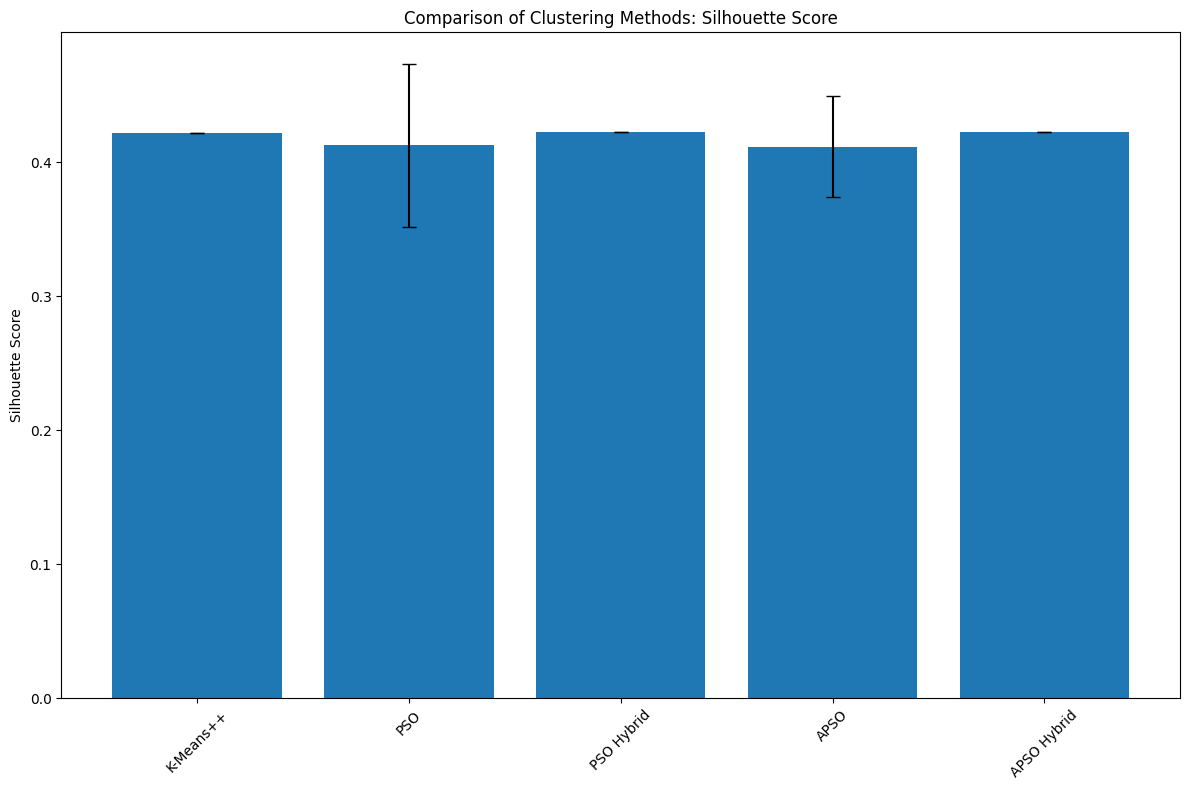

In [14]:


plt.figure(figsize=(12, 8))
plt.bar(benchmark['method'], benchmark['silhouette_mean'], yerr=benchmark['silhouette_stdev'], capsize=5)
plt.title('Comparison of Clustering Methods: Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

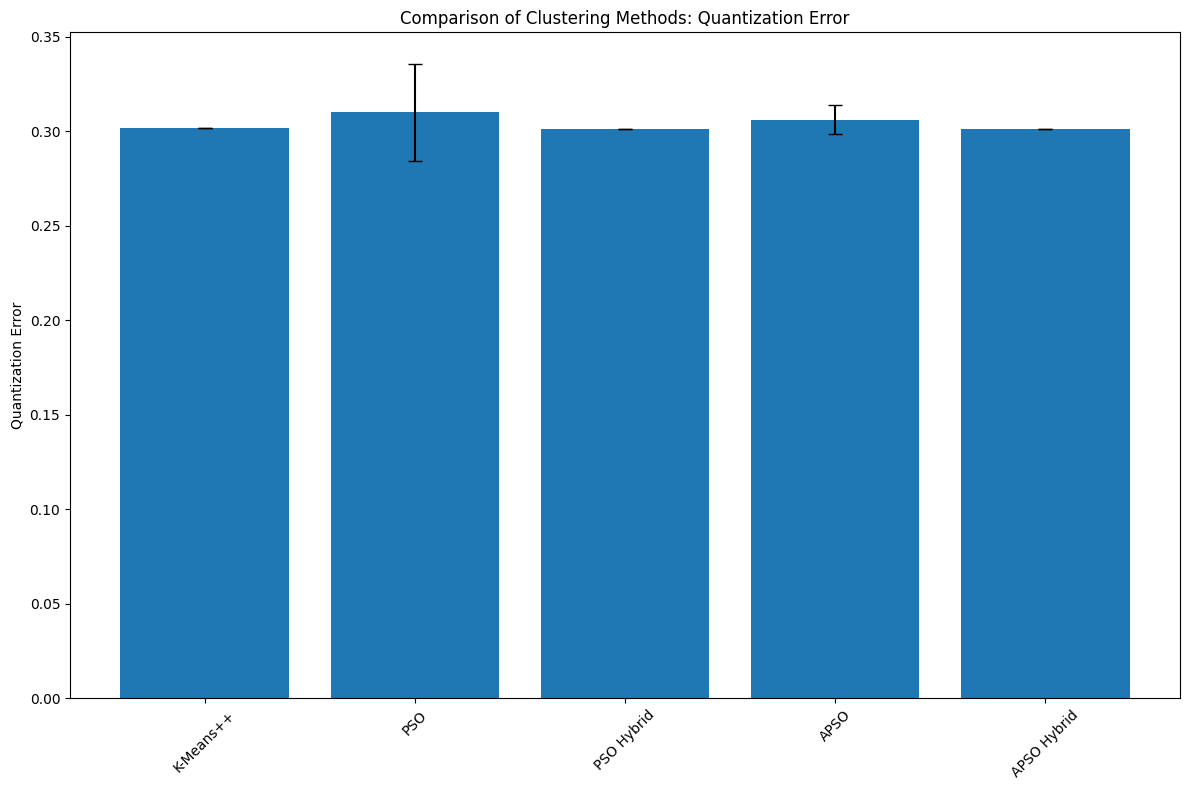

In [15]:


plt.figure(figsize=(12, 8))
plt.bar(benchmark['method'], benchmark['quantization_mean'], yerr=benchmark['quantization_stdev'], capsize=5)
plt.title('Comparison of Clustering Methods: Quantization Error')
plt.ylabel('Quantization Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Initial global best score 0.3597377662087698
Iteration 0001/0100 current gbest score 0.359737766208769794
Iteration 0011/0100 current gbest score 0.352185372990768297
Iteration 0021/0100 current gbest score 0.350411077151274286
Iteration 0031/0100 current gbest score 0.349665429853411591
Iteration 0041/0100 current gbest score 0.349079454251944810
Iteration 0051/0100 current gbest score 0.349079454251944810
Iteration 0061/0100 current gbest score 0.349079454251944810
Iteration 0071/0100 current gbest score 0.348968426247751706
Iteration 0081/0100 current gbest score 0.348968426247751706
Iteration 0091/0100 current gbest score 0.348968426247751706
Finish with gbest score 0.348962735294387372
Initial global best score 0.30166461874754386
Iteration 0001/0100 current gbest score 0.301664618747543856
Iteration 0011/0100 current gbest score 0.301664618747543856
Iteration 0021/0100 current gbest score 0.301474283757657890
Iteration 0031/0100 current gbest score 0.301470308192428205
Iteration 

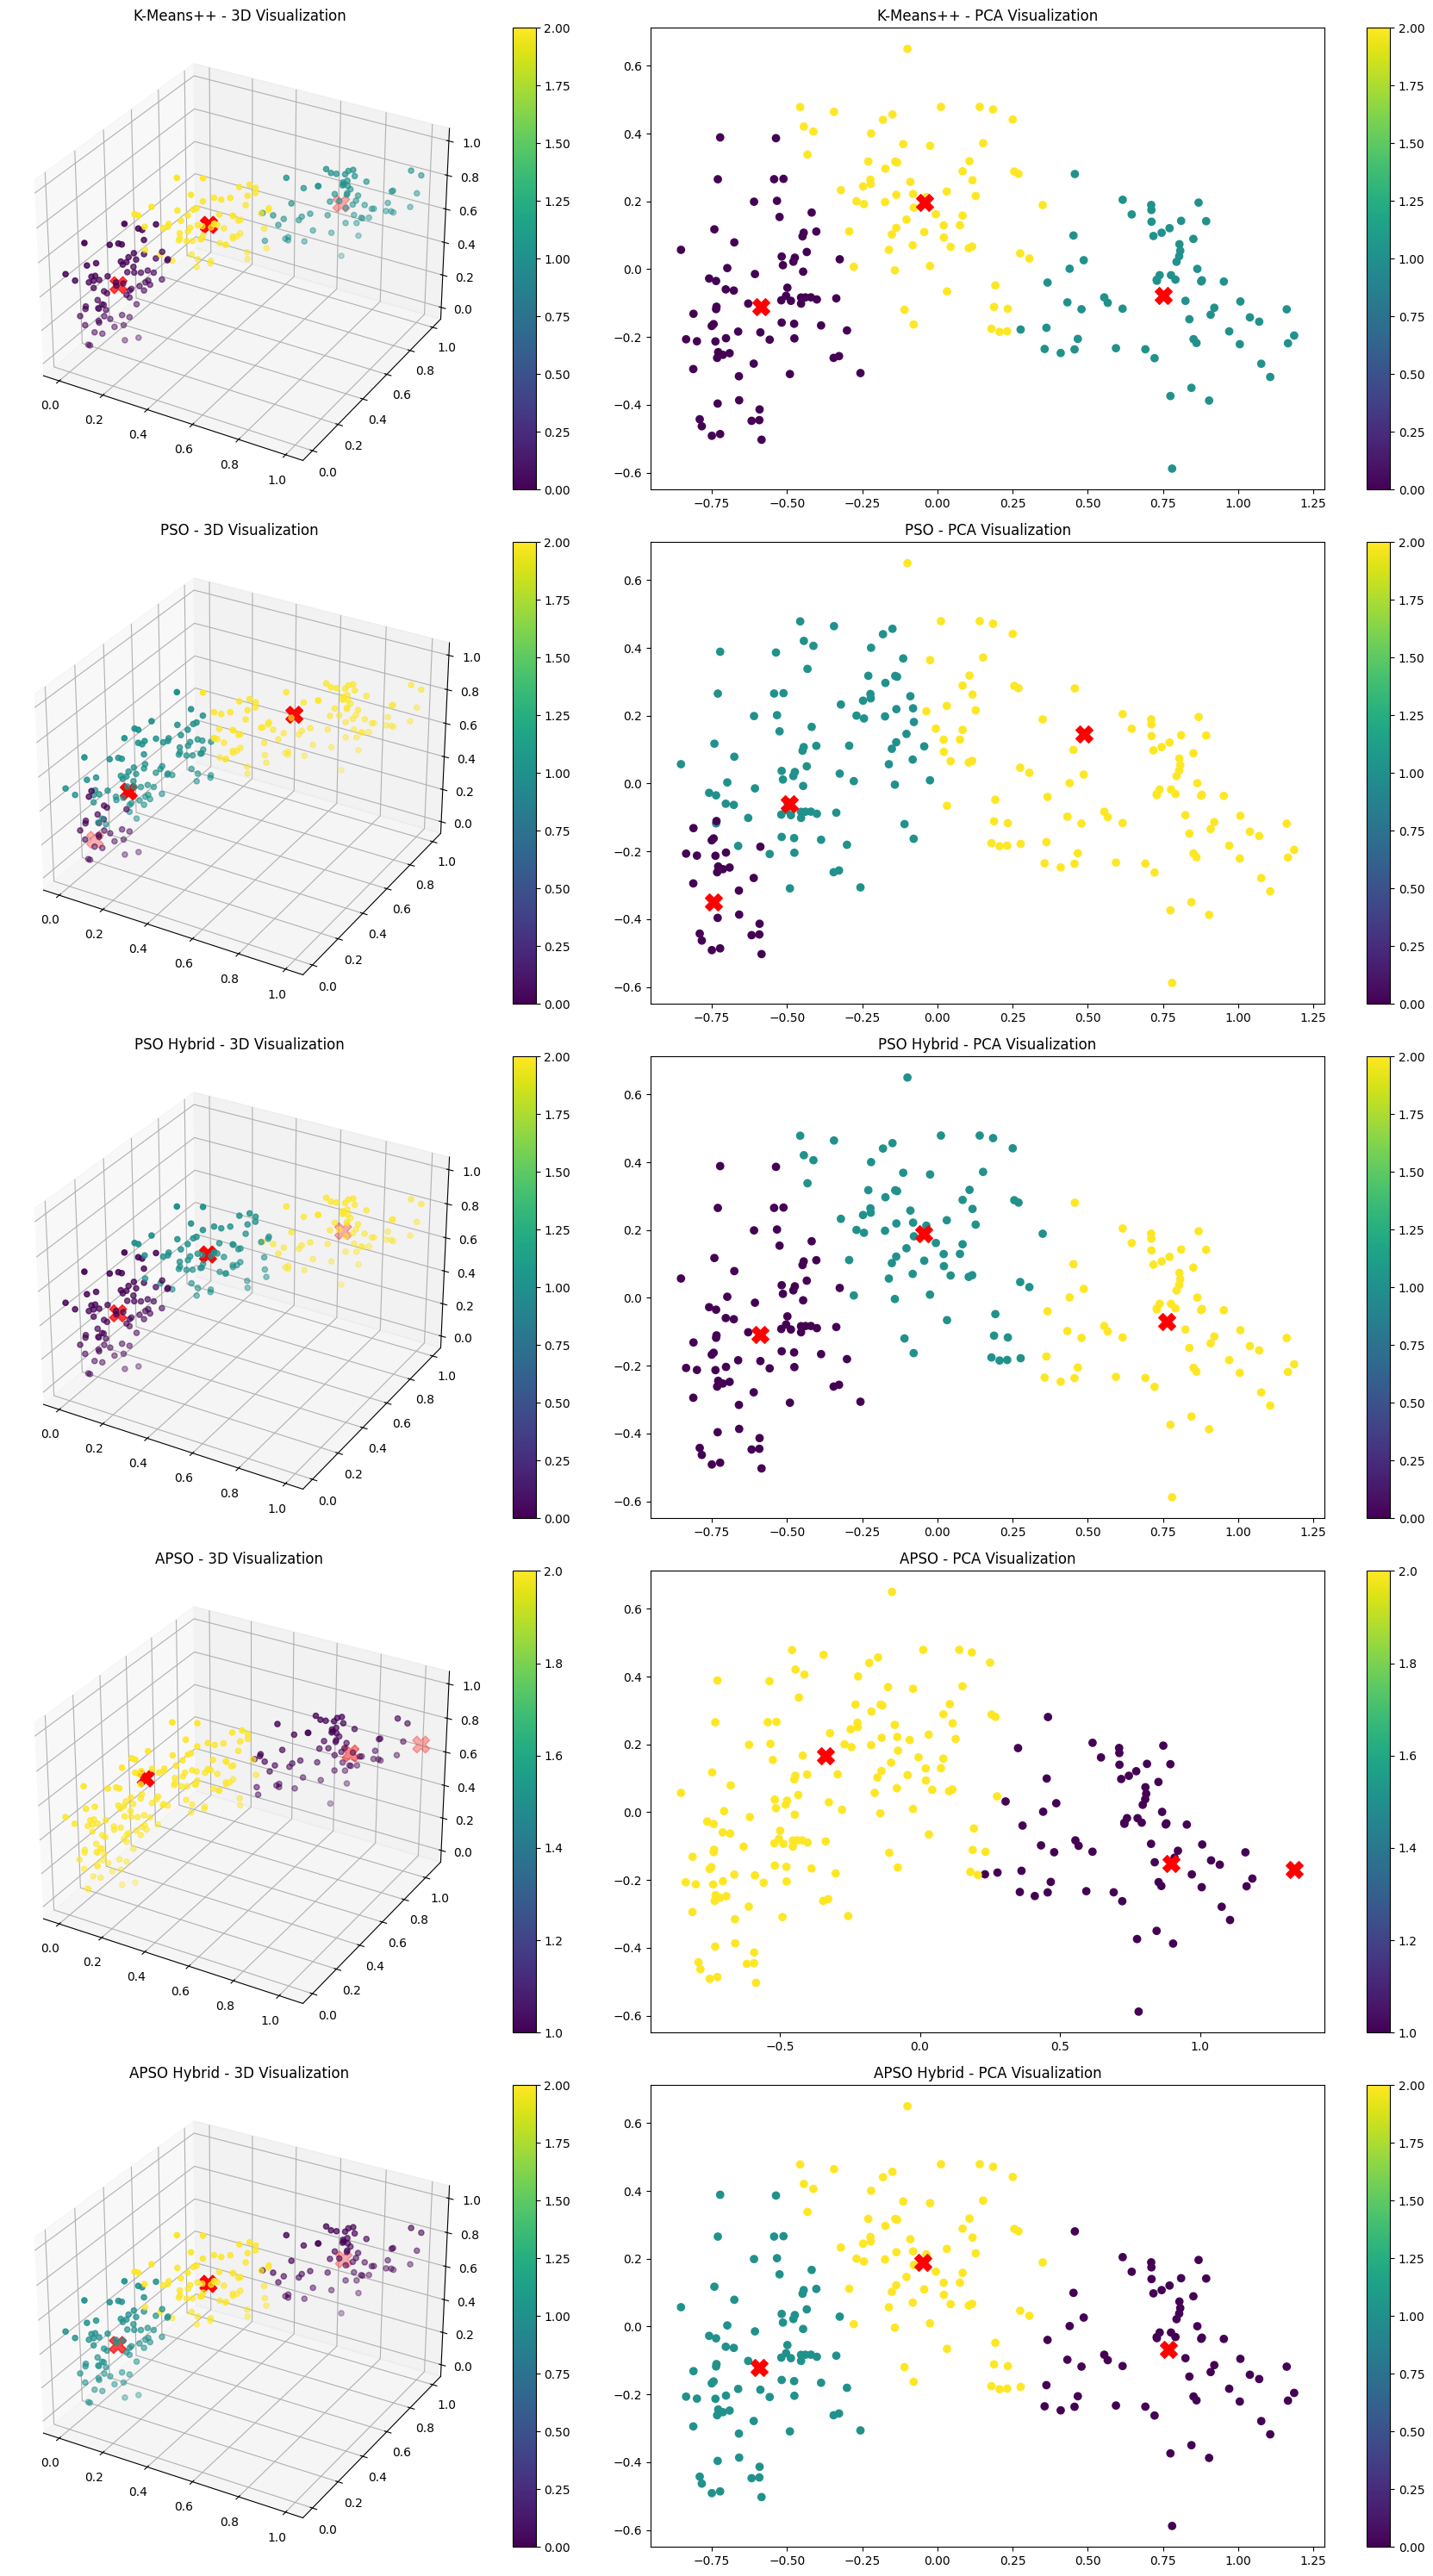

C:\Users\shiva\AppData\Local\Temp\ipykernel_21056\1568707574.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\shiva\AppData\Local\Temp\ipykernel_21056\1568707574.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\shiva\AppData\Local\Temp\ipykernel_21056\1568707574.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


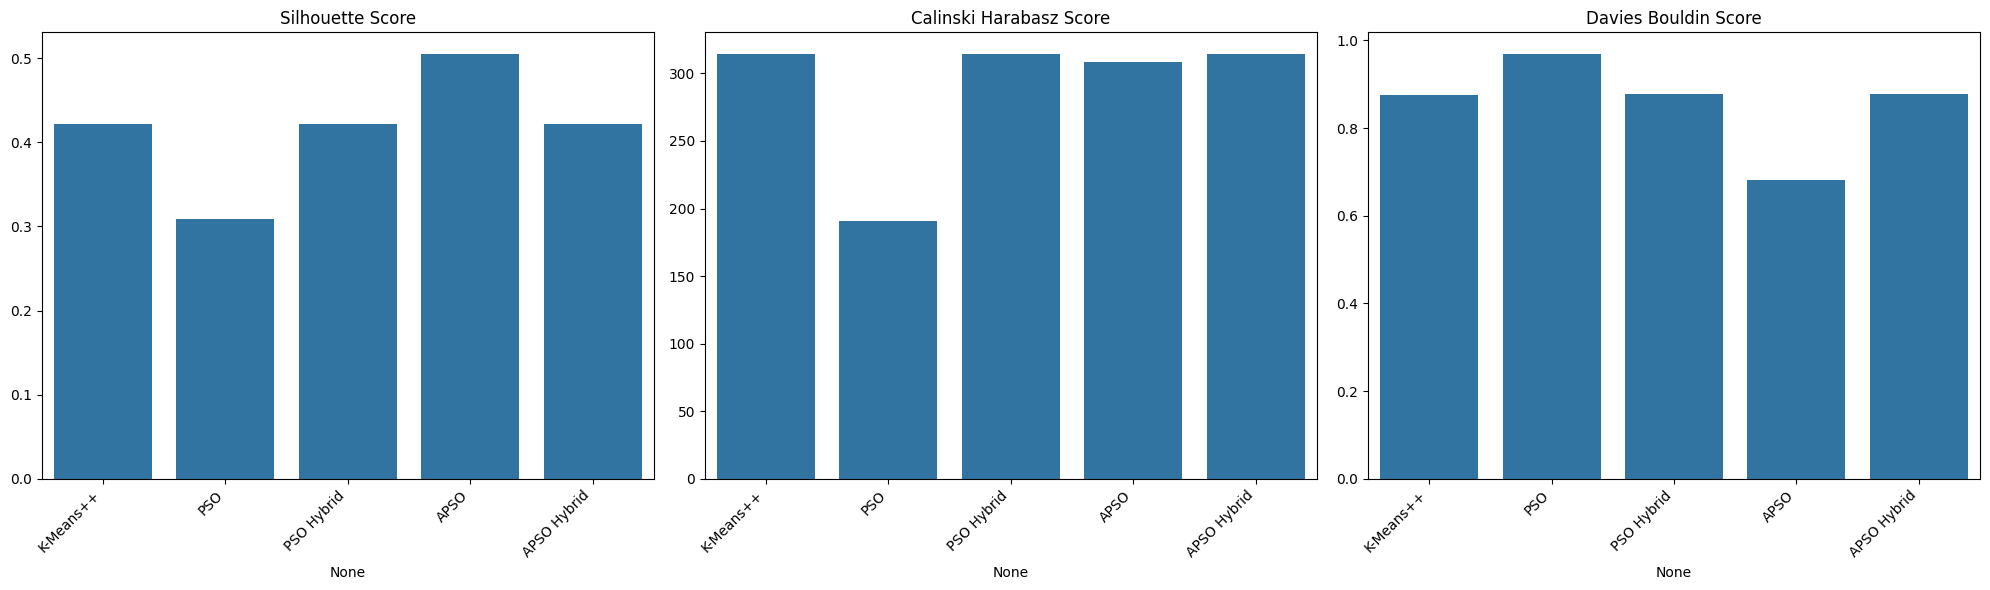

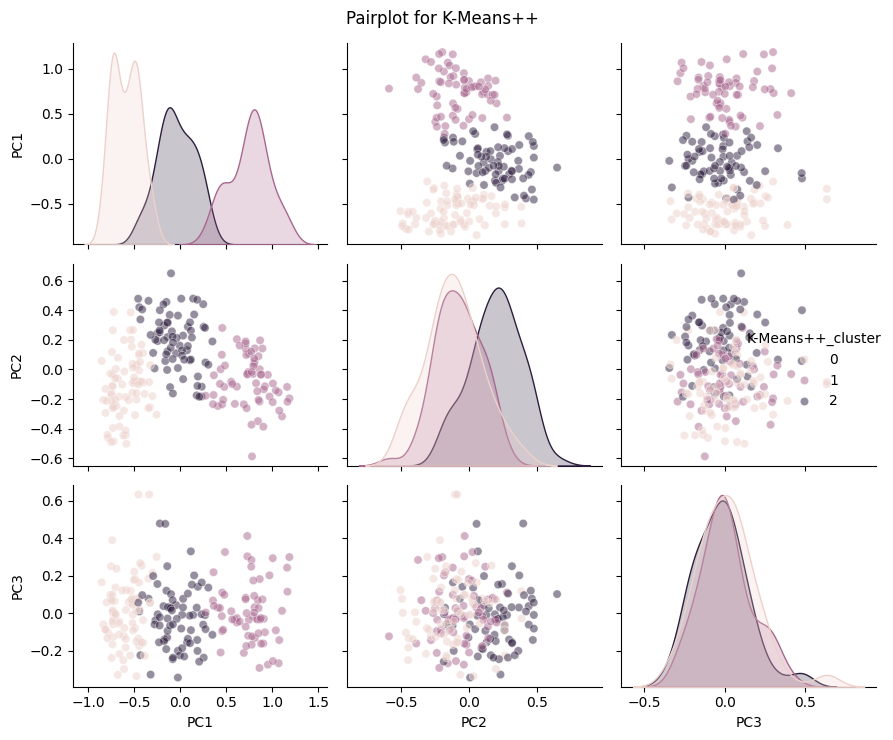

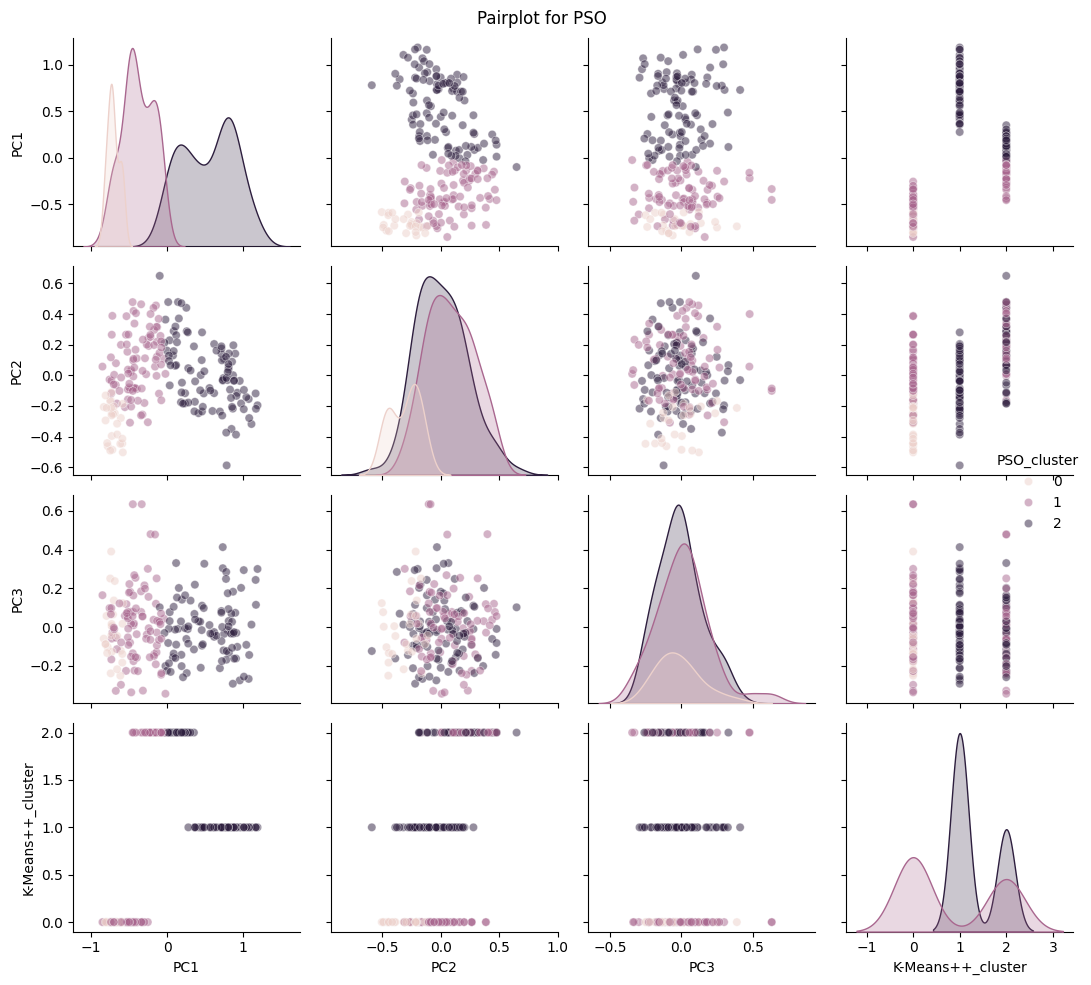

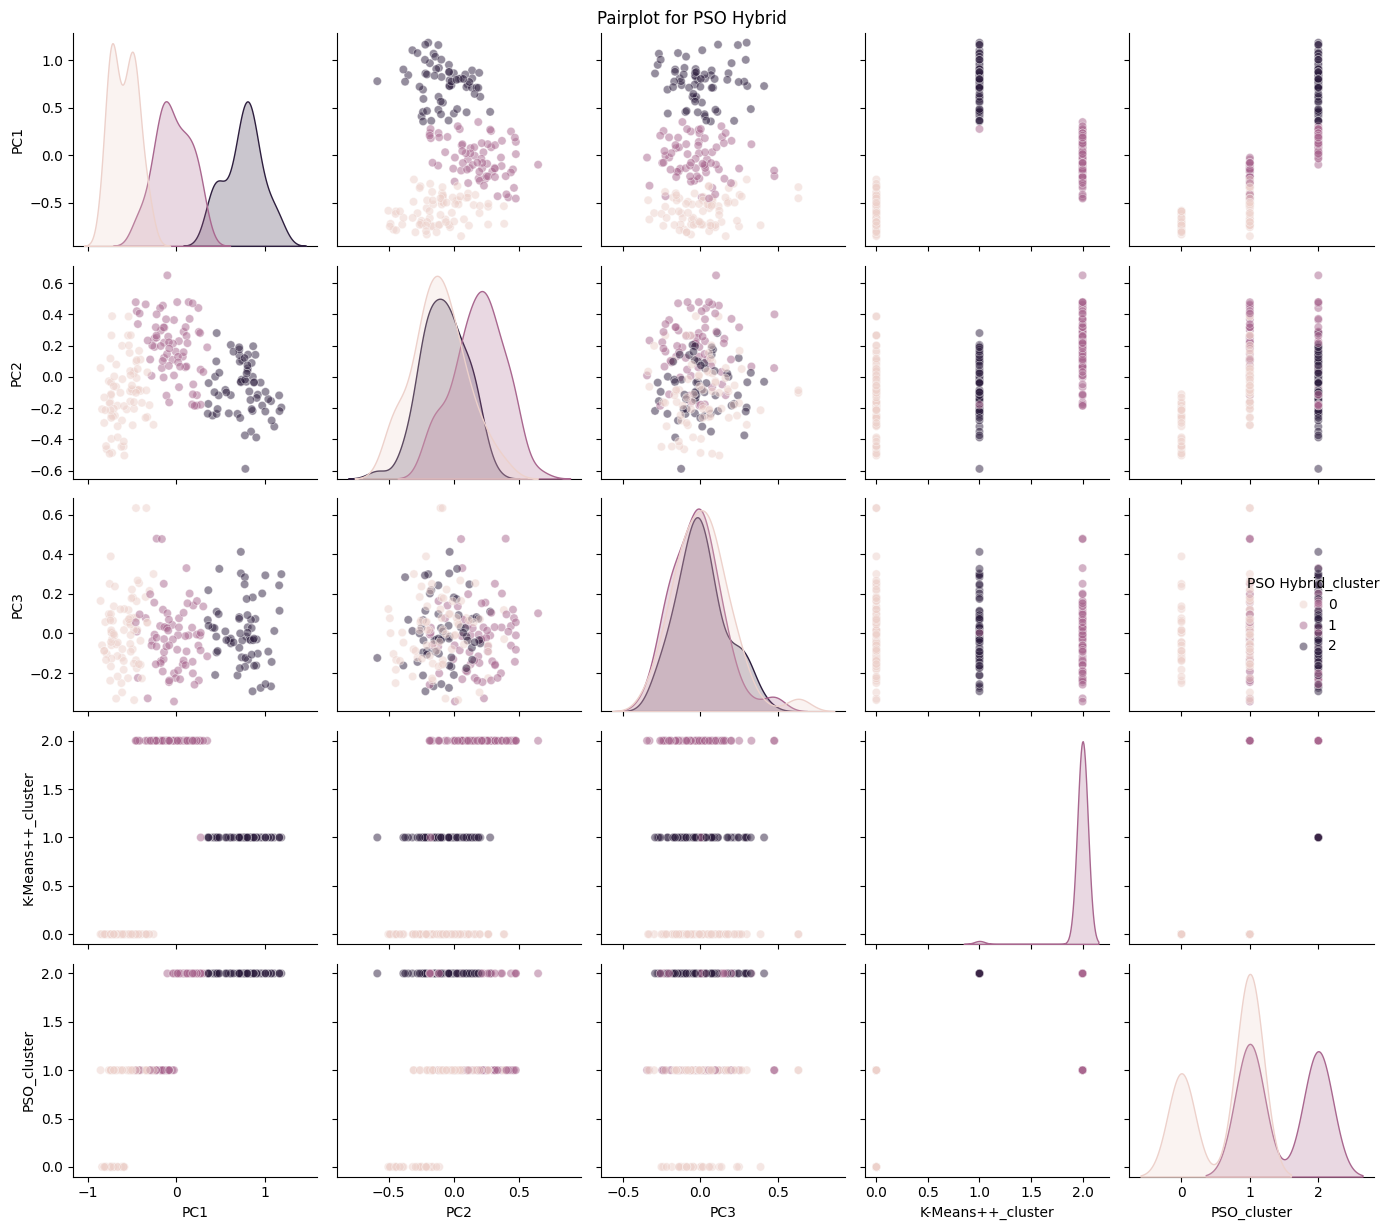

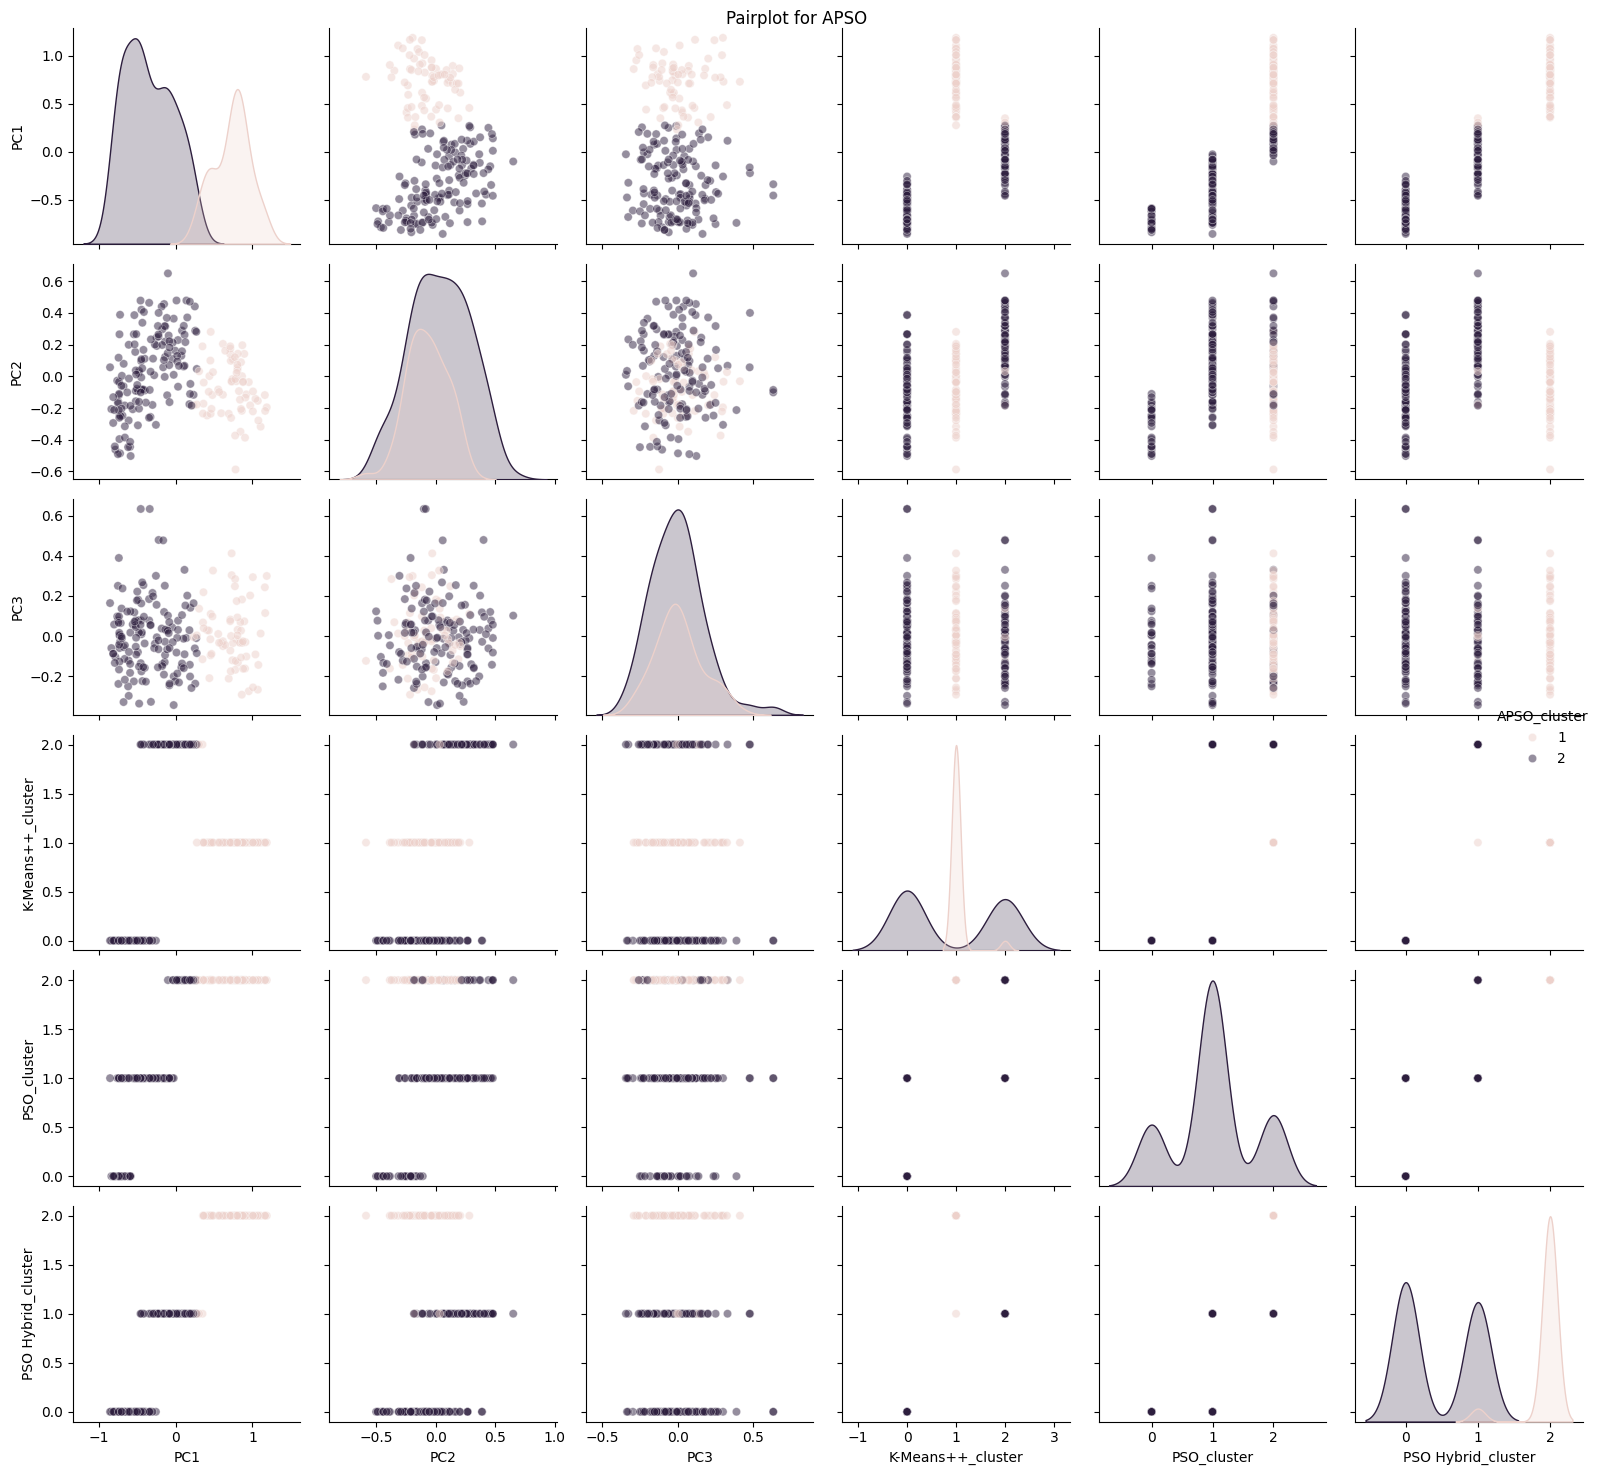

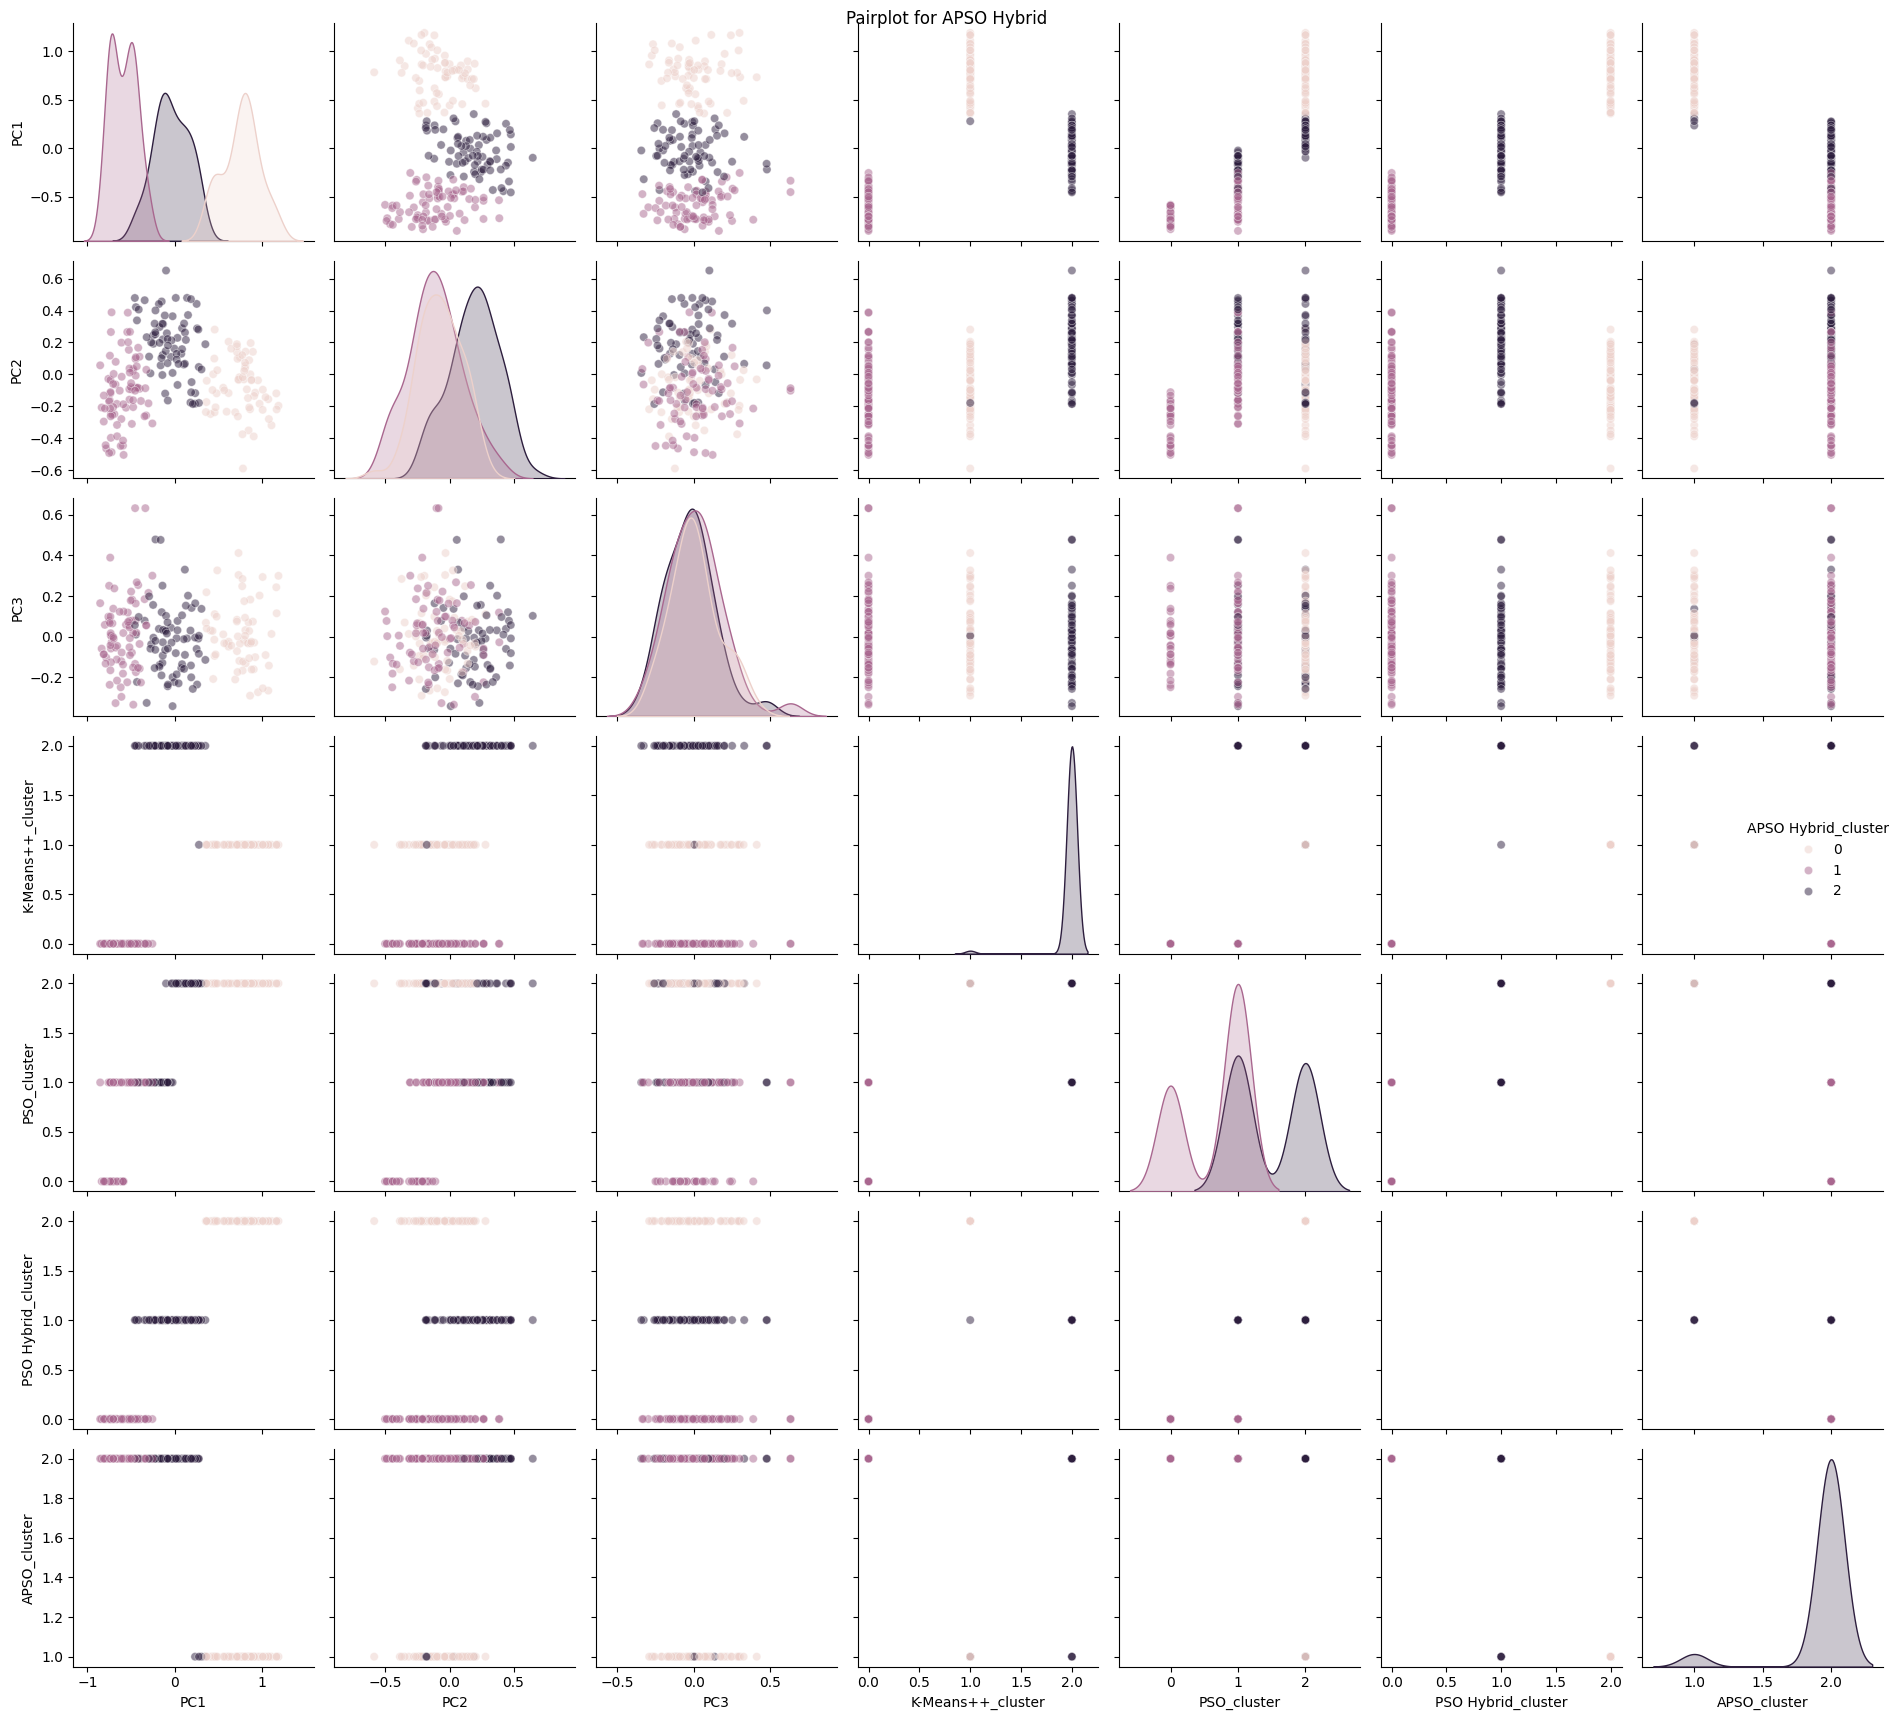

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

def visualize_clusters_subplots(data, methods, labels_dict, centroids_dict):
    fig = plt.figure(figsize=(20, 30))
    
    # 3D visualizations
    for i, method in enumerate(methods):
        ax = fig.add_subplot(5, 2, 2*i+1, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_dict[method], cmap='viridis')
        ax.scatter(centroids_dict[method][:, 0], centroids_dict[method][:, 1], centroids_dict[method][:, 2], 
                   color='red', s=200, marker='X')
        ax.set_title(f'{method} - 3D Visualization')
        plt.colorbar(scatter, ax=ax)
    
    # PCA visualizations
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    for i, method in enumerate(methods):
        ax = fig.add_subplot(5, 2, 2*i+2)
        scatter = ax.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_dict[method], cmap='viridis')
        centroids_2d = pca.transform(centroids_dict[method])
        ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='red', s=200, marker='X')
        ax.set_title(f'{method} - PCA Visualization')
        plt.colorbar(scatter, ax=ax)
    
    plt.tight_layout()
    plt.show()

def calculate_metrics(data, labels_dict):
    metrics = {
        'silhouette': {},
        'calinski_harabasz': {},
        'davies_bouldin': {}
    }
    
    for method, labels in labels_dict.items():
        metrics['silhouette'][method] = silhouette_score(data, labels)
        metrics['calinski_harabasz'][method] = calinski_harabasz_score(data, labels)
        metrics['davies_bouldin'][method] = davies_bouldin_score(data, labels)
    
    return metrics

def plot_metrics(metrics):
    metrics_df = pd.DataFrame(metrics)
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    for i, (metric, scores) in enumerate(metrics_df.items()):
        sns.barplot(x=scores.index, y=scores.values, ax=axes[i])
        axes[i].set_title(f'{metric.replace("_", " ").title()} Score')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Assuming you have your data in 'x', and results for each method
methods = ['K-Means++', 'PSO', 'PSO Hybrid', 'APSO', 'APSO Hybrid']
labels_dict = {}
centroids_dict = {}

for method in methods:
    if method == 'K-Means++':
        kmeans = KMeans(n_cluster=3, init_pp=True)
        kmeans.fit(x)
        labels_dict[method] = kmeans.predict(x)
        centroids_dict[method] = kmeans.centroid
    else:
        if 'PSO' in method:
            pso = ParticleSwarmOptimizedClustering(n_cluster=3, n_particles=10, data=x, hybrid=('Hybrid' in method))
        else:  # APSO
            pso = AdaptiveParticleSwarmOptimizedClustering(n_cluster=3, n_particles=10, data=x, hybrid=('Hybrid' in method))
        pso.run()
        centroids_dict[method] = pso.gbest_centroids
        labels_dict[method] = pairwise_distances_argmin(x, centroids_dict[method])

# Visualize clusters
visualize_clusters_subplots(x, methods, labels_dict, centroids_dict)

# Calculate and plot metrics
metrics = calculate_metrics(x, labels_dict)
plot_metrics(metrics)

# Additional visualization: Pairplot
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])

for method in methods:
    df_pca[f'{method}_cluster'] = labels_dict[method]
    sns.pairplot(df_pca, hue=f'{method}_cluster', plot_kws={'alpha': 0.5})
    plt.suptitle(f'Pairplot for {method}')
    plt.tight_layout()
    plt.show()

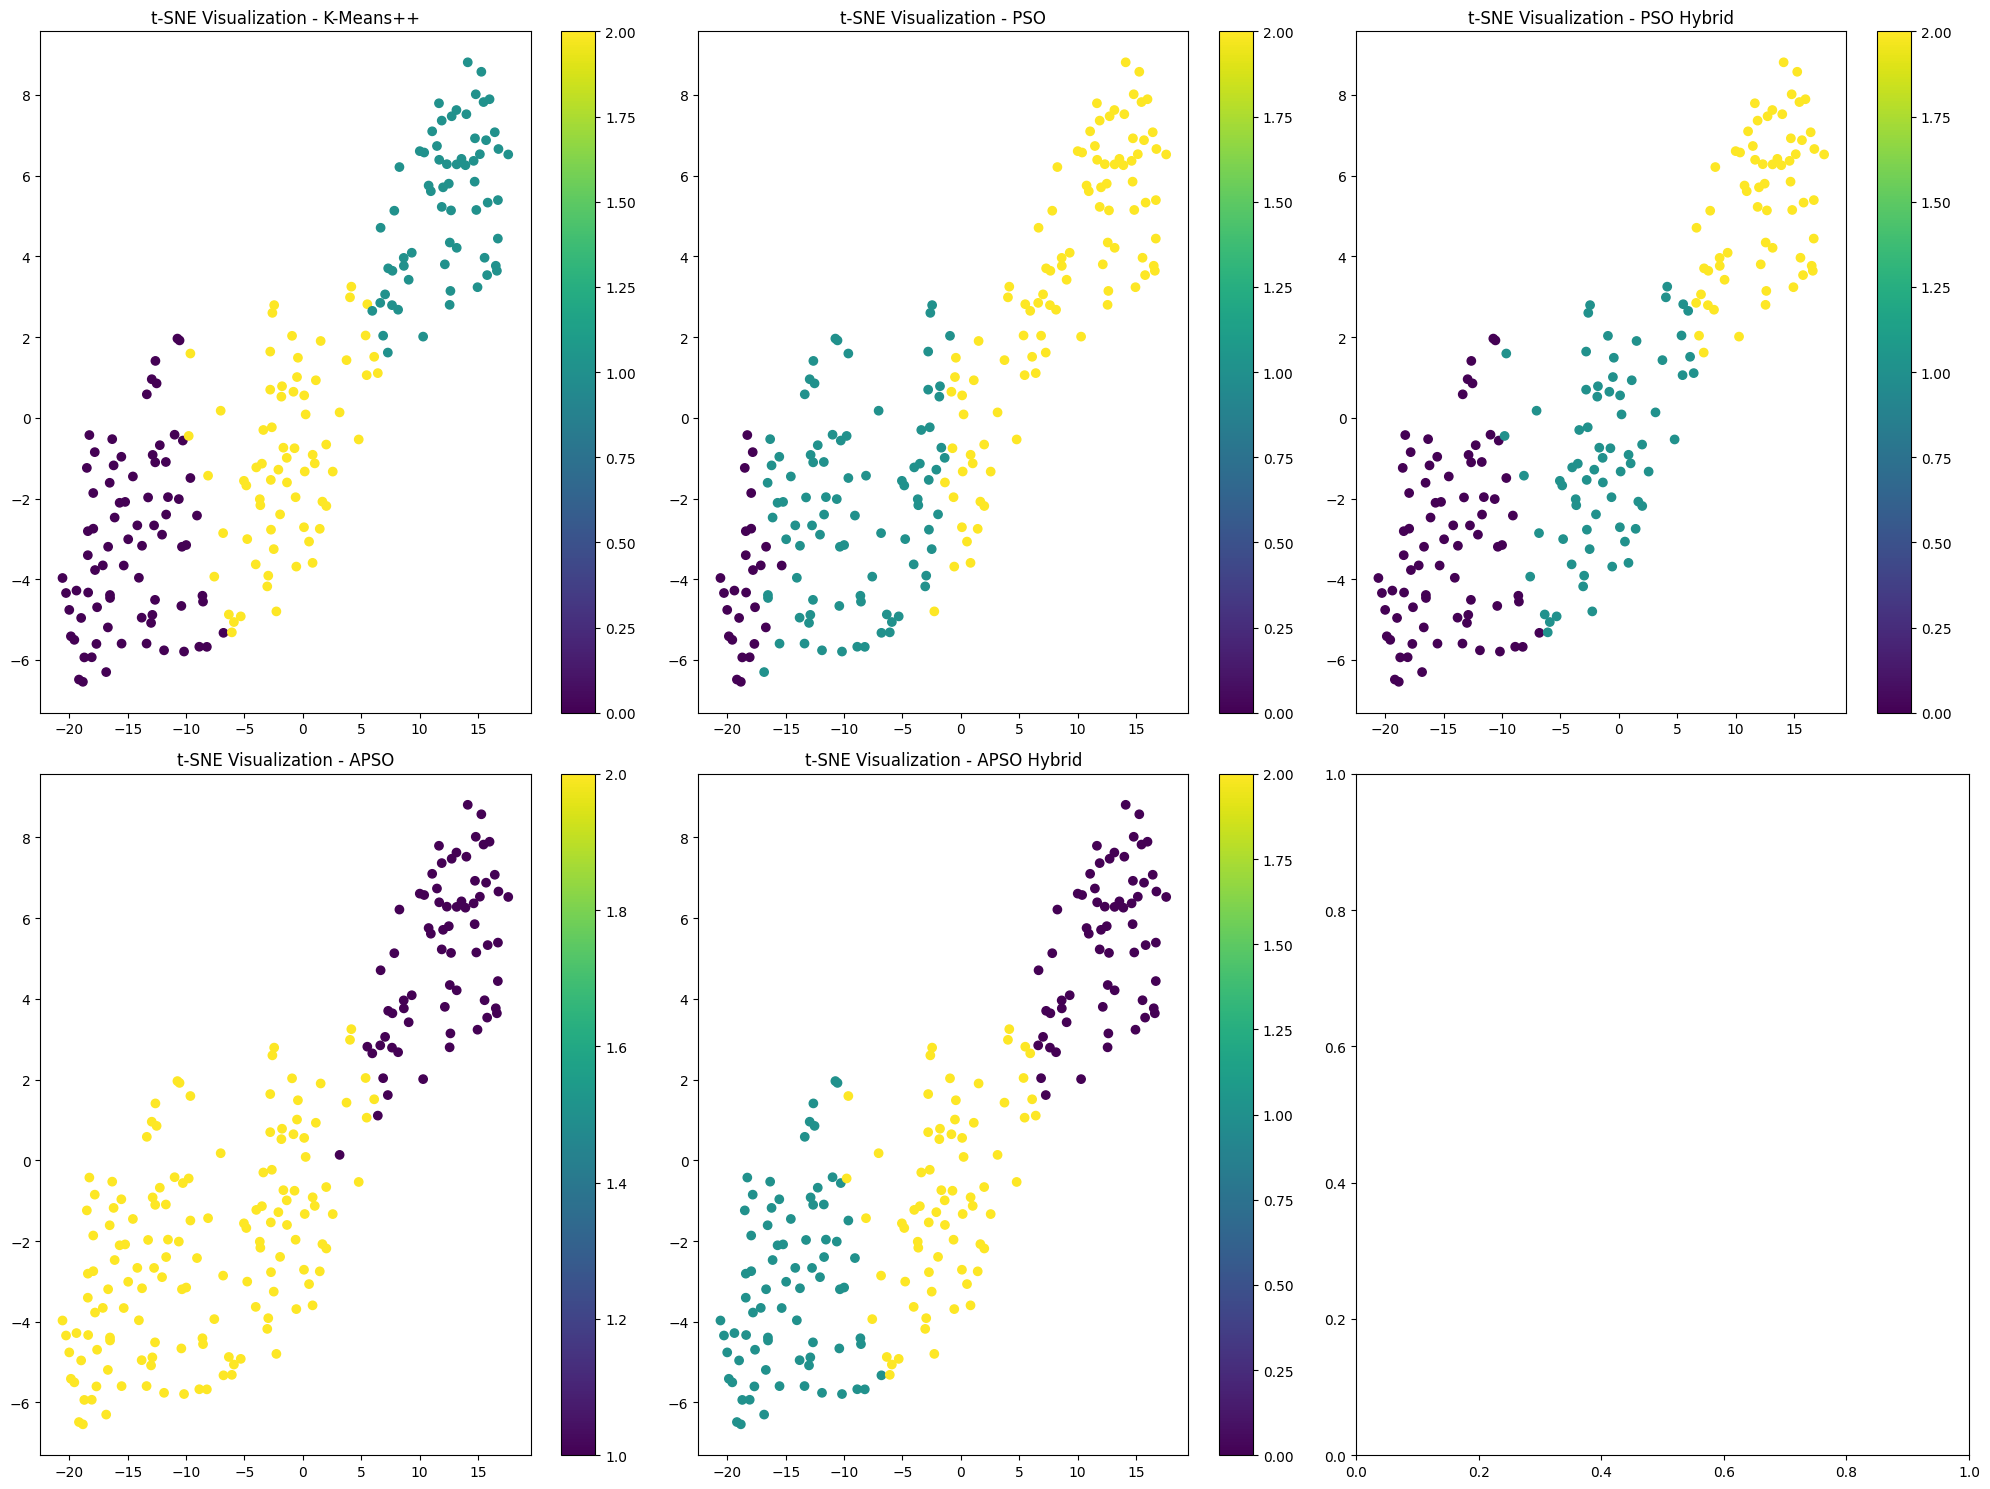

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(data, labels_dict, methods):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, method in enumerate(methods):
        scatter = axes[i].scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_dict[method], cmap='viridis')
        axes[i].set_title(f't-SNE Visualization - {method}')
        plt.colorbar(scatter, ax=axes[i])
    
    plt.tight_layout()
    plt.show()

# Use this function after you've run your clustering algorithms
plot_tsne(x, labels_dict, methods)